In [61]:
%matplotlib inline
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# mango anal

In [2]:
mango = pd.read_csv("export.xls", sep="\t")
mango.head()

,Commodity Name,Origin Name,Date,District,Pounds,Boxes of 8.8 lbs,Unnamed: 6
0,MANGOS,BRAZIL,01/1998,NOT SPECIFIED,"1,470,000","167,045",NaN
1,MANGOS,BRAZIL,02/1998,NOT SPECIFIED,"480,000","54,545",NaN
2,MANGOS,BRAZIL,09/1998,NOT SPECIFIED,"1,670,000","189,773",NaN
3,MANGOS,BRAZIL,10/1998,NOT SPECIFIED,"4,840,000","550,000",NaN
4,MANGOS,BRAZIL,11/1998,NOT SPECIFIED,"6,550,000","744,318",NaN


----------------------------------------------------------------------------------
## Data Cleanup

To begin cleaning up the data, we will lowercase all fields.

In [3]:
mango["Commodity Name"] = mango["Commodity Name"].str.lower()
mango["Origin Name"] = mango["Origin Name"].str.lower()
mango["District"] = mango["District"].str.lower()
mango.head()

,Commodity Name,Origin Name,Date,District,Pounds,Boxes of 8.8 lbs,Unnamed: 6
0,mangos,brazil,01/1998,not specified,"1,470,000","167,045",NaN
1,mangos,brazil,02/1998,not specified,"480,000","54,545",NaN
2,mangos,brazil,09/1998,not specified,"1,670,000","189,773",NaN
3,mangos,brazil,10/1998,not specified,"4,840,000","550,000",NaN
4,mangos,brazil,11/1998,not specified,"6,550,000","744,318",NaN


We'll search for any missing data. To begin, it seems that the `District` feature uses "not specified" to denote missing values. We'll replace it with `np.nan`.

In [4]:
mango["District"] = mango["District"].replace(to_replace="not specified", value=np.nan)
mango.head()

,Commodity Name,Origin Name,Date,District,Pounds,Boxes of 8.8 lbs,Unnamed: 6
0,mangos,brazil,01/1998,NaN,"1,470,000","167,045",NaN
1,mangos,brazil,02/1998,NaN,"480,000","54,545",NaN
2,mangos,brazil,09/1998,NaN,"1,670,000","189,773",NaN
3,mangos,brazil,10/1998,NaN,"4,840,000","550,000",NaN
4,mangos,brazil,11/1998,NaN,"6,550,000","744,318",NaN


In [5]:
mango["District"].value_counts()

mexico crossings thru nogales               224
mexico crossings through otay mesa          187
mexico crossings thru texas                 128
mexico crossings through pharr, tx           85
mexico crossings through progreso, tx        63
mexico crossings through laredo, tx          62
mexico crossings through san luis            39
imports through south florida/tampa          37
mexico crossings through rio grande city     37
mexico crossings through calexico            15
imports through los angeles-long beach       10
imports through los angeles airport           8
imports through philadelphia-camden           7
imports through seattle-tacoma                4
imports through houston                       4
imports through new york jfk airport          3
imports through dallas-fort worth             2
imports through sumas (washington)            2
imports through newark-elizabeth (nj)         2
san francisco/oakland                         2
imports through panama city (florida)   

In addition, it seems that the `Unnamed: 6` field is just garbage data since it doesn't contain any non-NaN values. We'll drop it.

In [6]:
mango["Unnamed: 6"].value_counts()

Series([], Name: Unnamed: 6, dtype: int64)

In [7]:
mango = mango.drop("Unnamed: 6", axis=1)
mango

,Commodity Name,Origin Name,Date,District,Pounds,Boxes of 8.8 lbs
0,mangos,brazil,01/1998,NaN,"1,470,000","167,045"
1,mangos,brazil,02/1998,NaN,"480,000","54,545"
2,mangos,brazil,09/1998,NaN,"1,670,000","189,773"
3,mangos,brazil,10/1998,NaN,"4,840,000","550,000"
4,mangos,brazil,11/1998,NaN,"6,550,000","744,318"
...,...,...,...,...,...,...
2005,mangos,venezuela,04/1999,NaN,"650,000","73,864"
2006,mangos,venezuela,05/1999,NaN,"170,000","19,318"
2007,mangos,venezuela,03/2000,NaN,"180,000","20,455"
2008,mangos,venezuela,04/2000,NaN,"40,000","4,545"


Similarly, we'll replace the rather verbose `Boxes of 8.8 lbs` with `4kg boxes`.

In [8]:
mango = mango.rename(lambda s: "4kg boxes" if s == "Boxes of 8.8 lbs" else s, axis=1)
mango

,Commodity Name,Origin Name,Date,District,Pounds,4kg boxes
0,mangos,brazil,01/1998,NaN,"1,470,000","167,045"
1,mangos,brazil,02/1998,NaN,"480,000","54,545"
2,mangos,brazil,09/1998,NaN,"1,670,000","189,773"
3,mangos,brazil,10/1998,NaN,"4,840,000","550,000"
4,mangos,brazil,11/1998,NaN,"6,550,000","744,318"
...,...,...,...,...,...,...
2005,mangos,venezuela,04/1999,NaN,"650,000","73,864"
2006,mangos,venezuela,05/1999,NaN,"170,000","19,318"
2007,mangos,venezuela,03/2000,NaN,"180,000","20,455"
2008,mangos,venezuela,04/2000,NaN,"40,000","4,545"


We'll also change the `Date` field to a `Year` field and a `Month` field.

In [9]:
mango["Date"] = pd.to_datetime(mango["Date"])
mango["Year"] = mango["Date"].dt.year
mango["Month"] = mango["Date"].dt.month
mango = mango.drop("Date", axis=1)
mango

,Commodity Name,Origin Name,District,Pounds,4kg boxes,Year,Month
0,mangos,brazil,NaN,"1,470,000","167,045",1998,1
1,mangos,brazil,NaN,"480,000","54,545",1998,2
2,mangos,brazil,NaN,"1,670,000","189,773",1998,9
3,mangos,brazil,NaN,"4,840,000","550,000",1998,10
4,mangos,brazil,NaN,"6,550,000","744,318",1998,11
...,...,...,...,...,...,...,...
2005,mangos,venezuela,NaN,"650,000","73,864",1999,4
2006,mangos,venezuela,NaN,"170,000","19,318",1999,5
2007,mangos,venezuela,NaN,"180,000","20,455",2000,3
2008,mangos,venezuela,NaN,"40,000","4,545",2000,4


Similarly, the `Commodity Name` field is clearly redundant.

In [10]:
mango = mango.drop("Commodity Name", axis=1)

Let's now take a look at the datatypes of the individual columns just to make sure we don't have weird string issues later on.

In [11]:
for c in mango.columns:
    print(f"dtype of {c} is {mango[c].dtype}")

dtype of Origin Name is object
dtype of District is object
dtype of Pounds is object
dtype of 4kg boxes is object
dtype of Year is int64
dtype of Month is int64


It turns out that the numerical fields aren't actually numerical--let's fix that.

In [12]:
mango["Pounds"] = mango["Pounds"].str.replace(r"[^0-9]", "").astype(int)
mango

,Origin Name,District,Pounds,4kg boxes,Year,Month
0,brazil,NaN,1470000,"167,045",1998,1
1,brazil,NaN,480000,"54,545",1998,2
2,brazil,NaN,1670000,"189,773",1998,9
3,brazil,NaN,4840000,"550,000",1998,10
4,brazil,NaN,6550000,"744,318",1998,11
...,...,...,...,...,...,...
2005,venezuela,NaN,650000,"73,864",1999,4
2006,venezuela,NaN,170000,"19,318",1999,5
2007,venezuela,NaN,180000,"20,455",2000,3
2008,venezuela,NaN,40000,"4,545",2000,4


Ditto for the boxes:

In [13]:
mango["4kg boxes"] = mango["4kg boxes"].str.replace(r"[^0-9]", "").astype(int)
mango

,Origin Name,District,Pounds,4kg boxes,Year,Month
0,brazil,NaN,1470000,167045,1998,1
1,brazil,NaN,480000,54545,1998,2
2,brazil,NaN,1670000,189773,1998,9
3,brazil,NaN,4840000,550000,1998,10
4,brazil,NaN,6550000,744318,1998,11
...,...,...,...,...,...,...
2005,venezuela,NaN,650000,73864,1999,4
2006,venezuela,NaN,170000,19318,1999,5
2007,venezuela,NaN,180000,20455,2000,3
2008,venezuela,NaN,40000,4545,2000,4


In [45]:
mango

,Origin Name,District,Pounds,4kg boxes,Year,Month
0,brazil,NaN,1470000,167045,1998,1
1,brazil,NaN,480000,54545,1998,2
2,brazil,NaN,1670000,189773,1998,9
3,brazil,NaN,4840000,550000,1998,10
4,brazil,NaN,6550000,744318,1998,11
...,...,...,...,...,...,...
2005,venezuela,NaN,650000,73864,1999,4
2006,venezuela,NaN,170000,19318,1999,5
2007,venezuela,NaN,180000,20455,2000,3
2008,venezuela,NaN,40000,4545,2000,4


--------------------------------------------------------------------
## Exploratory Data Analysis

### Year-over-year mango import growth

We'll begin by taking a look at how mango imports have changed year-over-year.

Text(0, 0.5, 'Billion Pounds of Mangoes')

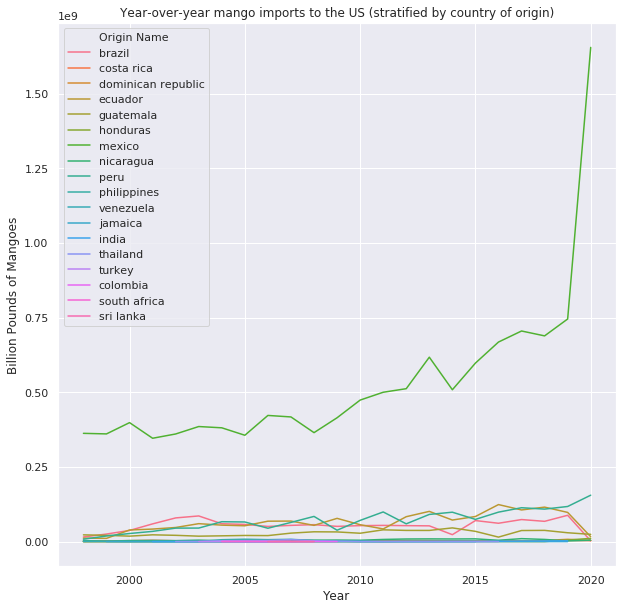

In [86]:
by_year = pd.DataFrame(mango.sort_values(by="Month", ascending=True).groupby(["Year", "Origin Name"]).agg(np.sum)["Pounds"]).reset_index()
plt.figure(figsize=(10,10))
sns.lineplot(x="Year", y="Pounds", data=by_year, hue="Origin Name")
plt.title("Year-over-year mango imports to the US (stratified by country of origin)")
plt.xlabel("Year")
plt.ylabel("Billion Pounds of Mangoes")
#plt.ylim(0, .25e9)

What about India?

In [69]:
india = mango[mango["Origin Name"] == "india"].groupby("Year").agg(sum)["Pounds"]
india

Year
2001      40000
2002      30000
2003      70000
2004     260000
2005      50000
2006      40000
2007     400000
2008     640000
2009     350000
2010     750000
2011     170000
2012     540000
2013     450000
2014     630000
2015     710000
2016    1190000
2017    1860000
2018    2220000
2019    2470000
Name: Pounds, dtype: int64

Text(0, 0.5, 'Pounds')

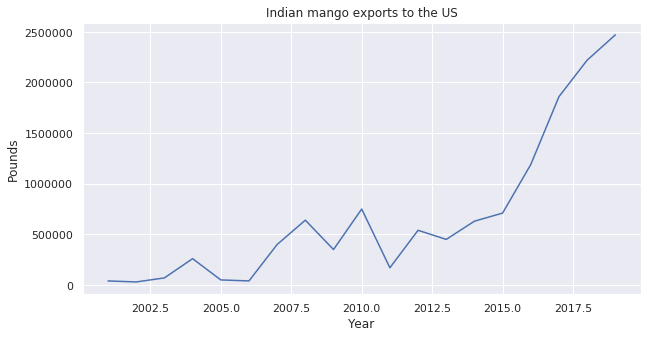

In [73]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=india)
plt.title("Indian mango exports to the US")
plt.xlabel("Year")
plt.ylabel("Pounds")

In [82]:
mango[mango["District"] == "imports through detroit"]

,Origin Name,District,Pounds,4kg boxes,Year,Month
1075,mexico,imports through detroit,9002,1023,2011,1
